# Linear regression

## Regression problem
Regression problems occur often in machine learning, for example, if you want to estimate weight, age or height of a person in an image. In regression problems you need to estimate a continuous target variable given a numer of observation variables. Typically the target output is a real number, $y \in \mathbb{R}$. A regression problem in computer vision is for example the 3D pose of an object in image.

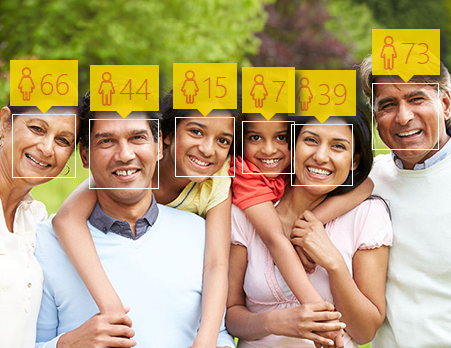

In the case of age estimation from an image, the ML problem is defined similar to what we know from the first lecture, $y=f(x)$, where $x$ is the image of a human face, $y$ is age (e.g. $\in [0,130]$) and $f$ is the ML model that maps image to the integer/real number of age.

**Example 2.1** Let's assume that you are a hobit MD, who has money to buy only one new instrument, either a scale for measuring weight or a measure to measure height. You want to save some money and as a ML enthusiast you think that you can estimate the weight $y$ if you buy only a cheap tape measure for height. You simply measure height $x$ and use some ML model to estimate height $y=f(x)$.

## Linear model

Our model is a line and the equation should be familiar from high school:

\begin{equation}
y = ax+b \enspace .
\end{equation}

## Fitting a line

Fitting a line essentially means that the model parameters $a$ and $b$ are tuned to fit your data. Can you think of some methods immediately? 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2.0,10)
#
# Plot some pre-defined lines
plt.clf()
a=0
b=0
y = a*x+b
plt.plot(x,y,label='a=0 b=0')
a=10
b=0
y = a*x+b
plt.plot(x,y,label='a=10 b=0')
a=0
b=40
y = a*x+b
plt.plot(x,y,label='a=0 b=40')
a=10
b=40
y = a*x+b
plt.plot(x,y,label='a=10 b=40')
a=0
b=80
y = a*x+b
plt.plot(x,y,label='a=0 b=80')
plt.legend()
plt.title('Lines y=ax+b with selected values of a and b (x: height, y: weight)')
plt.xlabel('height [m]')
plt.ylabel('Weight [kg]')
plt.axis([0,2,0,150])
plt.show()

You might remember that $a$ is called *slope* and $b$ is called *intercept*, and for obvious reasons.

### Zero training samples

In [ ]:
# Plot random lines
for foo in range(5):
    a = np.random.uniform(-50.0,+50.0,1)
    b = np.random.uniform(0.0,+150.0,1)
    x = np.linspace(0,2.0,10)
    y = a*x+b
    plt.plot(x,y)
plt.title('Lines y=ax+b with random values of a and b (x: height, y: weight)')
plt.xlabel('height [m]')
plt.ylabel('Weight [kg]')
plt.axis([0,2,0,150])
plt.show()

### One sample (a point in the plot)

We measure one hobit: $(x_1,y_1) = (1.11,85.0)$

In [ ]:
# Plot lines through one given point
plt.clf()
# point 1
x1 = 1.1
y1 = 85.0
plt.plot(x1, y1,'bo')
plt.annotate("(x1, y1)", (x1, y1), textcoords="offset points",xytext=(-0.1,10),ha='right')
a=0
b=y1-a*x1
y = a*x+b
plt.plot(x,y,label='a=0')
a=1
b=y1-a*x1
y = a*x+b
plt.plot(x,y,label='a=1')
a=5
b=y1-a*x1
y = a*x+b
plt.plot(x,y,label='a=5')
a=10
b=y1-a*x1
y = a*x+b
plt.plot(x,y,label='a=10')
a=20
b=y1-a*x1
y = a*x+b
plt.plot(x,y,label='a=20')
a=40
b=y1-a*x1
x = np.linspace(0,2.0,10)
y = a*x+b
plt.plot(x,y,label='a=40')
plt.legend()
plt.title('Lines that follow 85=a*x1+b')
plt.xlabel('height [m]')
plt.ylabel('weight [kg]')
plt.axis([0,2,0,150])
plt.show()

### Two samples

In [ ]:
# Plot the line through two given points
plt.clf()
# point 1
x1 = 1.11
y1 = 85.0
plt.plot(x1, y1,'bo')
plt.annotate("(1.11,85.0)", (x1, y1), textcoords="offset points",xytext=(-0.1,10),ha='right')
x2 = 1.52
y2 = 110.0
plt.plot(x2, y2,'bo')
plt.annotate("(1.52,110.0)", (x2, y2), textcoords="offset points",xytext=(-0.1,10),ha='right')

# Calculate slope (m) and y-intercept (b)
a = (y2 - y1) / (x2 - x1)
b = y1 - a * x1

x = np.linspace(0, 2, 10)
y = a * x + b

"""
a=60.98
b=17.32
x = np.linspace(0,2.0,10)
y = a*x+b
"""

plt.plot(x,y,'b-',label='y=60.98x+17.32')
plt.legend()
plt.title('Line through two known points')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.axis([0,2,0,150])
# test point
x3,y3=0.95,72

plt.plot(x3, y3,'ro')
plt.annotate("(0.95,72)", (x3, y3), textcoords="offset points",xytext=(-0.1,10),ha='right')

plt.show()

Let's test the model for one hold-out sample (test sample), a hobit who is 95cm tall and weights 72kg.

In [ ]:
x3,y3=0.95,72
print(a,b)
y3_h = a*x3+b
print(f'Estimate y_h for x_3 is {y3_h:.2f} while the true value is {y3} - the model gives error (residual) {y3-y3_h:.2f}')

### N samples

In [ ]:
# N points
np.random.seed(42) # to always get the same points
N = 50 
x = np.random.normal(1.1,0.3,N)
a_gt = 50.0
b_gt = 20.0
y_noise =  np.random.normal(0,8,N) # Measurements from the class 1\n",
y = a_gt*x+b_gt+y_noise
plt.plot(x,y,'bo')
plt.title('Training data')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.axis([0,2,0,150])
plt.show()

We cannot anymore fit a line that goes through every point so instead we define an error measure we will minimize.

**Definition 2.2.: Mean Squared Error (MSE)**

The Mean Squared Error for estimates $\hat{y}$ and known (ground truth) values $y$ is computed from
\begin{equation}
    \epsilon_{MSE} = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2
\end{equation}

In [ ]:
from matplotlib.colors import LogNorm

# Compute MSE heat map for different a and b
MSE_ab = np.empty([11,11])
for ai,a in enumerate((range(0,110,10))):
    for bi, b in enumerate((range(0,110,10))):
        y_hat = a*x+b
        MSE_ab[ai][bi] = np.sum((y-y_hat)**2)/N
        
plt.imshow(MSE_ab,extent= [-5,105,-5,105], cmap='hot', norm=LogNorm(), interpolation='nearest')
plt.colorbar()
plt.ylabel('a')
plt.xlabel('b')
plt.title('MSE for different values of a and b')
plt.show()

During lectures we start to derive the formulas for solving $a$ and $b$ for $N$ points and finishing that and writing the code will be your next week exercise.

## Scikit-Learn

Despite that we implement many of the methods from the scratch, in real life you use existing implementations of these methods. One of the most important libraries is Scikit-Learn that provides well tested, efficient and effective methods for the most needs:

 * https://scikit-learn.org/
 
Install via Conda:
 
```shell 
(dataml100) $ conda install -c anaconda scikit-learn
```
 

### Scikit-Learn linear regression demo: House price estimation

Let's study how we can use linear regression _i.e.,_ least squares fitting to estimate house prices in Hervanta region. The data is downloaded from http://asuntojen.hintatiedot.fi/haku/, copied to excel, cleaned and saved as `csv`. The data looks as follows.

num_rooms|type|sqm|eur/sqm|year|elevator|condition
---|---|---|---|---|---|---
1|kt|31,5|2413|1974|on|hyvä
1|rt|37|3405|2018|ei|hyvä
1|kt|30|3683|1990|on|tyyd.
1|kt|35|2343|1981|on|tyyd.
1|kt|32|2656|1977|on|hyvä

First, let's import the required libraries. We are using `scikit-learn` exclusively here.

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

Load data line by line. Attributes (apt. size, year, etc) are added to the data matrix X, and the target (actual selling price per sqm) to the target vector y. 

In [ ]:
file = "prices.csv"

X = []
y = []

with open(file, "r", encoding='utf-8-sig') as f:
    for line in f:
        
        # Skip first line
        if line.startswith("num_rooms"):
            continue
        
        parts = line.strip().split(";")
        
        rooms = int(parts[0])
        kind  = parts[1]
        
        # Numbers use Finnish locale with decimals separated by comma.
        # Just use replace(), although the proper way would be with
        # locale module.
        
        sqm   = float(parts[2].replace(",", "."))
        price = float(parts[3])
        year  = int(parts[4])
        elev  = parts[5]
        cond  = parts[6]
        
        X.append([rooms, kind, sqm, year, elev, cond])
        y.append(price)
        
X = np.array(X)
y = np.array(y)
print(X)

Some columns are categorical, so we need to encode those as dummy indicator variables. For example, `condition = {good, satisfactory, bad}` is encoded into three binary (numerical) variables: `is_good`, `is_satisfactory` and `is_bad`.

House type is ok/kt/rt, elevator is yes/no and conditions is good/satisfactory. Those add 7 binary dimensions. In addition to three original numerical dimensions.

In [ ]:
binarized_cols = [1, 4, 5]

# Add binarized colors to the end
for col in binarized_cols:
    lb = LabelBinarizer()
    z = lb.fit_transform(X[:, col])
    X = np.append(X, z, axis = 1)

# Delete original columns
for col in binarized_cols[::-1]: 
    X = np.delete(X, col, axis = 1)

X = X.astype(float)
y = y.astype(float)
print(X[0,:])

Next, split the data into training and testing to evaluate the performance of our regression model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit the regression model and predict.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'True val: {y_test[0]} predicted val: {y_pred[0]}')

True val: 3405.0 predicted val: 6149.333333333343


Let's see how we did with the first five test apartments:

num_rooms|type|sqm|eur/sqm|year|elevator|condition|prediction|error
---|---|---|---|---|---|---|---|--
3|rt|75,5|1762|1978|ei|hyvä|1654.3|107.6
3|kt|63|2190|2004|on|hyvä|2402.0|212.0
3|rt|77|2948|2017|ei|hyvä|2972.7|24.7
2|kt|58|1483|1974|on|hyvä|1571.0|88.0
2|kt|58|1379|1974|on|hyvä|1571.0|192.0

Compute the mean error of prediction at the test whole partition.

In [9]:
error = mean_absolute_error(y_test, y_pred)
print("Mean absolute error: {:.1f} eur/sqm".format(error))

mean_difference = np.mean(y_pred - y_test)
print("Average prediction error: {:.1f} eur/sqm".format(mean_difference))

Mean absolute error: 2744.3 eur/sqm
Average prediction error: 2744.3 eur/sqm


Our model coefficients are the following:

In [10]:
print(model.coef_)

[-3.76587650e-13 -9.40000000e+01  9.66666667e+01  0.00000000e+00
  0.00000000e+00 -4.17666667e+02]


num_rooms|sqm|year|is_apt_building|is_house|is_row_house|no_elevator|has_elevator|is_good|is_bad
---|---|---|---|---|---|---|---|---|---
-154.06459911|-7.54989771|34.09409129|-374.30893573|570.79730825|-196.48837252|-55.32978503|52.2093088|38.80866212|-91.01797094

It seems the accuracy is somewhat reasonable given the simplicity of the model. Moreover, the coefficients make sense: unit price for larger apartments tends to decrease, elevator increases the price by about 100 €, etc.

## References

C.M. Bishop (2006): Pattern Recognition and Machine Learning, Chapter 3.

S.M. Sigler (1981): Gauss and the invention of least squares, The Annals of Statistics, Vol. 9, No. 3.

Juusi Eronen (2018): Housing unit price prediction system. MSc thesis, Tampere University of Technology. URL: https://urn.fi/URN:NBN:fi:tty-201810242467